#### 專題：爬取PTT專版，整理出流行的詞句與話題
* 選取看板：西洽(C_CHAT)

功能進度，完成後再匯整成一個專案

* ~~撈取前N頁標題~~ 完成
* 將標題丟入jieba斷詞分類(https://ppt.cc/fwWPqx) (需要再過濾介係詞)
* 自定義一些沒有的詞匯入jieba，並帶入繁體中文詞庫 (待新增)
* ~~用圖表呈現字詞出現的頻率(參考以前ML的檔案)~~ 完成
* ~~把結果餵給world cloud 呈現~~ 完成

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import jieba

In [2]:
# 爬頁面

URL_HOME = "https://www.ptt.cc/bbs/C_Chat/index.html"
HEADERS = {
    "user-agent": "Chrome/97.0.4692.71"
}
response = requests.get(url=URL_HOME, headers=HEADERS)
result = BeautifulSoup(response.text, "html5lib")
#result

In [3]:
btn = result.select("div.btn-group a")
btn

[<a class="btn selected" href="/bbs/C_Chat/index.html">看板</a>,
 <a class="btn" href="/man/C_Chat/index.html">精華區</a>,
 <a class="btn wide" href="/bbs/C_Chat/index1.html">最舊</a>,
 <a class="btn wide" href="/bbs/C_Chat/index17539.html">‹ 上頁</a>,
 <a class="btn wide disabled">下頁 ›</a>,
 <a class="btn wide" href="/bbs/C_Chat/index.html">最新</a>]

In [4]:
# 從上可知從第四個的href取得上一頁網址
prevURL = btn[3]['href']
prevURL

'/bbs/C_Chat/index17539.html'

In [5]:
URL_NOW = "https://www.ptt.cc" + prevURL
URL_NOW

'https://www.ptt.cc/bbs/C_Chat/index17539.html'

In [6]:
# 過濾出標題帶入字串

all_title_text = "" #所有標題爬完後的標題字串
#title = ""

def get_title(result):
    current_page_title_text = ""  #當前頁面的標題字串
    for i in result.find_all("div", {"class":"r-ent"}):
        # 過濾標題會有被刪文後變成Nonetype的狀況
        title_name = i.find(class_="title").a
        if title_name is None:
            pass
        else:
            print(title_name.text)
            current_page_title_text += title_name.text

    return current_page_title_text

# 爬一次第一頁
print("首頁")
all_title_text += get_title(result=result)


# 開始帶入之後頁面提取title(可能要把第一頁的爬取寫在一起)
for page in range(100):
    print("第{}頁".format(page+2))
    btn = result.select("div.btn-group a")
    prevURL = btn[3]['href']
    URL_NOW = "https://www.ptt.cc" + prevURL
    response = requests.get(url=URL_NOW, headers=HEADERS)
    result = BeautifulSoup(response.text, "html5lib")
    all_title_text += get_title(result=result)

首頁
[鬼滅]I smell a demon 
[閒聊] 有人今天收到巧克力的嗎
[閒聊] POE移除賽季主線重置會不會比較好？
[奶子] 有點危險 背後注意 繪師推薦
[閒聊] 機械法老吃雞
[新聞] 巨人配音現身動漫展...喊：萊納 你坐阿
[討論] 地錯算毒物小說嗎
[閒聊] 是不是露西亞給的自由過了火
[笑死] 遊戲王MD：所以說白金也是有智障的
[閒聊] 野生的幸福蛋
[鬼滅] 童磨
[閒聊] 哪些作品可以套用OO太可惡！
[ＳＣ] 情人節巧克前輩
[問題] 粉屍會嫉妒露的愛氣勢如虹嗎?
Re: [問題] 為什麼這麼多輕小漫畫都喜歡買奴隸?
Fw: [好雷] 讓我聽見愛的歌聲
[Vtub] Miko送的巧克力，好好吃捏
Re: [問題] 為什麼這麼多輕小漫畫都喜歡買奴隸?
[閒聊] 阿梅跟店長的情人節cover曲
[閒聊] 善逸情人節會怎麼跟禰豆子過？
[公告] 看板活動公告彙整 ＆ 置底推文閒聊區
[公告] C_Chat板板規 v.16.7
[公告] C_Chat板主徵選開始&發過年紅包
[公告] 咱就要卸任啦&快來參選板主
第2頁
Re: [討論] 為什麼日本忍者紅遍世界 武俠反而沒落
[閒聊] mfmf一定很愛露西亞 也把我比下去...
Re: [討論] VT換魂不換皮能被接受的方式
[閒聊] XB2范達美幕妮雅發功光就沒機會出現了吧
[巨人] 艾連跟吉克去哪裡學打棒球的
[閒聊] 哈洽馬如果有男友會不會炎上阿?
[Vtub] 風真168今晚工商的Heaven Burns Red
[Vtub] 想讓 露西婭 幫我吹告白氣球
[閒聊] 龍女僕、讚！(遊戲王MD)
[Vtub] 公視小媒突襲開播，情人節陪大家吃晚餐～
Re: [討論] VT換魂不換皮能被接受的方式
[Vtub] 彩虹社 帕塔姐 競艇播報
[閒聊] 蹲 小粉屍蹲 小粉屍蹲
Re: [閒聊] 幻塔和遊戲王根本制霸動漫節
[閒聊] 情人節的祝福
[22冬] 戀上換裝娃娃 動畫1-6
[情報] 寶可夢大師 小光&美夢神 震撼開抽
[閒聊] 我願為露西婭獻出ミミ
[討論] 傲嬌妹系還有市場嗎
第3頁
[閒聊] 妮雅初登場穿這套還會輸光焰嗎？
Re: [閒聊] 淘氣辣妹安城同學  83話
[閒聊] NCsoft公開5個新IP TL今年下半年全球上線
[奶子] 越南大戰 巨乳眼鏡馬尾妹
[討論] VT

In [7]:
#all_title_text

In [8]:
# 過濾標題的屬性符號&空白
all_title_text = all_title_text.replace("[", "")
all_title_text = all_title_text.replace("]", "")
all_title_text = all_title_text.replace(" ", "")

#去除中文常出現的標點符號(ptt會變成全形)
all_title_text = all_title_text.replace("？", "")
all_title_text = all_title_text.replace("，", "")
all_title_text = all_title_text.replace("。", "")
all_title_text = all_title_text.replace("！", "")
all_title_text = all_title_text.replace("《", "")
all_title_text = all_title_text.replace("》", "")

#去除中文常出現的介係詞、語尾詞等
all_title_text = all_title_text.replace("嗎", "")
all_title_text = all_title_text.replace("齁", "")
all_title_text = all_title_text.replace("的", "")
all_title_text = all_title_text.replace("了", "")
all_title_text = all_title_text.replace("會", "")
all_title_text = all_title_text.replace("有", "")
all_title_text = all_title_text.replace("在", "")
all_title_text = all_title_text.replace("再", "")
all_title_text = all_title_text.replace("跟", "")
all_title_text = all_title_text.replace("很", "")
all_title_text = all_title_text.replace("吧", "")
all_title_text = all_title_text.replace("啊", "")
all_title_text = all_title_text.replace("為", "")
all_title_text = all_title_text.replace("不", "")
all_title_text = all_title_text.replace("沒", "")
all_title_text = all_title_text.replace("是不是", "")
all_title_text = all_title_text.replace("是", "")
all_title_text = all_title_text.replace("什麼", "")
all_title_text = all_title_text.replace("甚麼", "")
all_title_text = all_title_text.replace("為何", "")
all_title_text = all_title_text.replace("為什麼", "")
all_title_text = all_title_text.replace("如果", "")
all_title_text = all_title_text.replace("怎麼", "")
all_title_text = all_title_text.replace("怎樣", "")


#去除西洽版中過常出現與內容無關的文字(如：標題類型)
all_title_text = all_title_text.replace("閒聊", "")
all_title_text = all_title_text.replace("Re:", "")
all_title_text = all_title_text.replace("Fw:", "")
all_title_text = all_title_text.replace("公告", "")
all_title_text = all_title_text.replace("情報", "")
all_title_text = all_title_text.replace("討論", "")
all_title_text = all_title_text.replace("問題", "")
all_title_text = all_title_text.replace("Vtub", "") #如果過多可以加上，所以到底為什麼不開專版


# 去除英文上的標點符號
import string
all_title_text = all_title_text.translate(str.maketrans('', '', string.punctuation))

In [9]:
# 設定jieba
# 使用繁體中文詞庫
jieba.set_dictionary('./Data/dict.txt.big')

# 使用預設的精確模式
print('預設:', '|'.join(jieba.cut(all_title_text, cut_all=False, HMM=True)))

# 自定義字典，把一些專門字詞or術語加入

jieba.load_userdict('./Data/userDict.txt')
#print(jieba.lcut(all_title_text))

Building prefix dict from o:\PyCrawlerMarathon\homework\Data\dict.txt.big ...
Loading model from cache C:\Users\GSX-40~1\AppData\Local\Temp\jieba.u68c22222193cad0ec588c535d654ef9c.cache
Loading model cost 1.189 seconds.
Prefix dict has been built successfully.


預設: 鬼滅|Ismellademon|人|今天|收到|巧克力|POE|移除|賽季|主線|重置|比較|好|奶子|點|危險|背後|注意|繪師|推薦|機械|法老|吃|雞|新聞|巨人|配音|現身|動漫展|喊|：|萊納|你|坐|阿地|錯算|毒物|小說|露西亞|給|自由|過火|笑|死|遊戲王|MD|：|所以|說白|金|也|智障|野生|幸福|蛋鬼滅|童磨|哪些|作品|可以|套用|OO|太|可惡|Ｓ|Ｃ|情人節|巧克|前輩|粉屍|嫉妒|露愛|氣勢如虹|這麼|多輕|小|漫畫|都|喜歡|買|奴隸|好雷|讓|我|聽見|愛|歌聲|Miko|送|巧克力|好|好吃|捏|這麼|多輕|小|漫畫|都|喜歡|買|奴隸|阿梅|店長|情人節|cover|曲善|逸|情人節|禰|豆子|過看|板|活動|彙|整|＆|置底|推文區|CChat|板板規|v167CChat|板主徵選|開始|發過|年|紅包|咱|就要|卸任|啦|快來|參選|板主|日本|忍者|紅遍|世界|武俠|反而|落|mfmf|一定|愛|露西亞|也|把|我|比|下去|VT|換魂|換皮|能|被|接受|方式|XB2|范達|美幕妮雅|發功光|就機|出現|巨人|艾連吉克去|哪裡學|打|棒球|哈洽|馬|男友|炎上|阿風真|168|今晚|工商|HeavenBurnsRed|想|讓|露西|婭|幫|我|吹|告白|氣球|龍|女僕|、|讚|遊戲王|MD|公視|小媒|突襲|開播|情人節|陪|大家|吃|晚餐|～|VT|換魂|換皮|能|被|接受|方式|彩虹|社帕塔姐|競艇|播報|蹲|小粉|屍|蹲|小粉|屍|蹲|幻塔|和|遊戲王|根本|制霸|動漫|節|情人節|祝福|22|冬戀|上|換裝|娃娃|動畫|16|寶可夢|大師|小光|美夢|神|震撼|開|抽|我|願|露西|婭|獻出|ミ|ミ|傲嬌妹|系還|市場|妮雅初|登場|穿|這套|還輸|光焰|淘氣|辣妹|安城|同學|83|話|NCsoft|公開|5|個|新|IPTL|今年|下半年|全球|上線|奶子|越南|大戰|巨乳|眼鏡|馬尾|妹|VT|換魂|換皮|能|被|接受|方式|課長|客到|最後|變|股東|日本|忍者|紅遍|世界|武俠|反而|落|大膽|露裙|底|、|又|吸|又|狂|扭櫻|巫女|最後|疼愛|把|露西亞|手|放開|SONIC|情人節|活動|與|遊戲|新|支持|皮魂|人|應該|換中|之|人|也|差|霹靂|布袋戲|哪|一步|走|錯|日本|忍

In [10]:
print('預設:', '|'.join(jieba.cut(all_title_text, cut_all=False, HMM=True)))

預設: 鬼滅|Ismellademon|人|今天|收到|巧克力|POE|移除|賽季|主線|重置|比較|好|奶子|點|危險|背後|注意|繪師|推薦|機械|法老|吃|雞|新聞|巨人|配音|現身|動漫展|喊|：|萊納|你|坐|阿地|錯算|毒物|小說|露西亞|給|自由|過火|笑|死|遊戲王MD|：|所以|說白|金|也|智障|野生|幸福|蛋|鬼滅|童磨|哪些|作品|可以|套用|OO|太|可惡|Ｓ|Ｃ|情人節|巧克|前輩|粉屍|嫉妒|露愛|氣勢如虹|這麼|多輕|小|漫畫|都|喜歡|買|奴隸|好雷|讓|我|聽見|愛|歌聲|Miko|送|巧克力|好|好吃|捏|這麼|多輕|小|漫畫|都|喜歡|買|奴隸|阿梅|店長|情人節|cover|曲善|逸|情人節|禰|豆子|過看|板|活動|彙|整|＆|置底|推文區|CChat|板板規|v167CChat|板主徵選|開始|發過|年|紅包|咱|就要|卸任|啦|快來|參選|板主|日本|忍者|紅遍|世界|武俠|反而|落|mfmf|一定|愛|露西亞|也|把|我|比|下去|VT|換魂|換皮|能|被|接受|方式|XB2|范達|美幕妮雅|發功光|就機|出現|巨人|艾連吉克去|哪裡學|打|棒球|哈洽|馬|男友|炎上|阿風真|168|今晚|工商|HeavenBurnsRed|想|讓|露西|婭|幫|我|吹|告白|氣球|龍|女僕|、|讚|遊戲王MD|公視|小媒|突襲|開播|情人節|陪|大家|吃|晚餐|～|VT|換魂|換皮|能|被|接受|方式|彩虹|社帕塔姐|競艇|播報|蹲|小粉|屍|蹲|小粉|屍|蹲|幻塔|和|遊戲王|根本|制霸|動漫|節|情人節|祝福|22冬|戀上|換裝|娃娃|動畫|16|寶可夢|大師|小光|美夢|神|震撼|開|抽|我|願|露西|婭|獻出|ミ|ミ|傲嬌妹|系還|市場|妮雅初|登場|穿|這套|還輸|光焰|淘氣|辣妹|安城|同學|83|話|NCsoft|公開|5|個|新|IPTL|今年|下半年|全球|上線|奶子|越南|大戰|巨乳|眼鏡|馬尾|妹|VT|換魂|換皮|能|被|接受|方式|課長|客到|最後|變|股東|日本|忍者|紅遍|世界|武俠|反而|落|大膽|露裙|底|、|又|吸|又|狂|扭櫻|巫女|最後|疼愛|把|露西亞|手|放開|SONIC|情人節|活動|與|遊戲|新|支持|皮魂|人|應該|換中|之|人|也|差|霹靂|布袋戲|哪|一步|走|錯|日本|忍者|

In [11]:
word_list = jieba.lcut(all_title_text)

In [12]:
# 利用 collection 的 Counter 計算頻率
from collections import Counter
dict_text = Counter(word_list)
dict_text

import pandas as pd
# https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe
df = pd.DataFrame.from_dict(dict_text, orient="index").reset_index().rename(columns={'index':'單字', 0:'次數'})
df = df.sort_values(by="次數", ascending=False)
df

,單字,次數
38,露西亞,76
2,人,74
1348,ま,74
3224,ふ,72
134,被,61
...,...,...
2232,電氣,1
2233,龍蝦,1
2241,鼓動,1
2242,烏俄,1


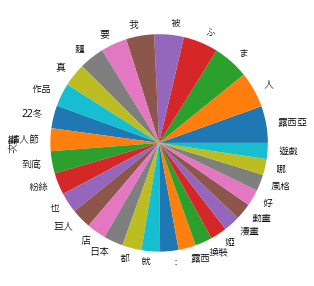

In [13]:
# 以圓餅圖呈現(TOP10)
# matplotlib 中文顯示問題
# https://ppt.cc/fTbrPx
plt.rcParams['axes.unicode_minus'] = False
df = df.set_index("單字").head(30)
df.plot(kind="pie", subplots=True, legend=False, figsize=(5,5))
plt.show()

In [14]:
# 使用wordcloud的generate_from_frequency生成文字雲

from wordcloud import WordCloud
#text = word_list
#my_dpi = 100
cloud = WordCloud(font_path="./Data/竹風體W4.ttc", scale=16).generate_from_frequencies(dict_text)
cloud.to_file('output.png')
#plt.imshow(cloud)

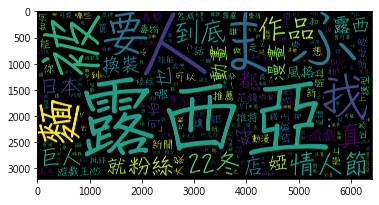

In [15]:
import matplotlib.image as img

image = img.imread('output.png')
plt.imshow(image)